In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score

In [41]:
# Import the dataset
dataset = pd.read_csv('admissions_data.csv')
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [42]:
# Divide into features and labels
labels = dataset.iloc[:,-1]
features = dataset.iloc[:, 1:-1]

# Split into training and test set
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.25, random_state = 42)

# Standardizing the data by scaling it
sc = StandardScaler()
features_train_scale = sc.fit_transform(features_train)
features_test_scale = sc.transform(features_test)

In [43]:
# Create a neural network model
def design_model(features):
    model = Sequential()
    features_shape = features.shape[1]
    input = keras.Input(shape=(features_shape,))
    model.add(input)
    
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1))
    
    opt = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='mse', metrics=['mae'], optimizer=opt)
    return model
    

In [44]:
# Create a new model
model = design_model(features_train_scale)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                256       
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Apply early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# Fit the data
history = model.fit(features_train_scale, labels_train.to_numpy(), epochs=100, batch_size=8, verbose=1, validation_split=0.25, callbacks=[es])

Epoch 1/100
36/36 [==============================] - 1s 10ms/step - loss: 1.0649 - mae: 0.9168 - val_loss: 0.3923 - val_mae: 0.5642
Epoch 2/100
36/36 [==============================] - 0s 4ms/step - loss: 0.4041 - mae: 0.5283 - val_loss: 0.0978 - val_mae: 0.2722
Epoch 3/100
36/36 [==============================] - 0s 3ms/step - loss: 0.2041 - mae: 0.3622 - val_loss: 0.0421 - val_mae: 0.1705
Epoch 4/100
36/36 [==============================] - 0s 4ms/step - loss: 0.1417 - mae: 0.3089 - val_loss: 0.0318 - val_mae: 0.1477
Epoch 5/100
36/36 [==============================] - 0s 4ms/step - loss: 0.1285 - mae: 0.2927 - val_loss: 0.0267 - val_mae: 0.1351
Epoch 6/100
36/36 [==============================] - 0s 4ms/step - loss: 0.0990 - mae: 0.2571 - val_loss: 0.0225 - val_mae: 0.1234
Epoch 7/100
36/36 [==============================] - 0s 3ms/step - loss: 0.1025 - mae: 0.2511 - val_loss: 0.0200 - val_mae: 0.1149
Epoch 8/100
36/36 [==============================] - 0s 3ms/step - loss: 0.0909 - 

In [48]:
# Evaluate the model
val_mse, val_mae = model.evaluate(features_test_scale, labels_test.to_numpy(), verbose=0)

print("MAE: ", val_mae)

y_pred = model.predict(features_test_scale)

print(r2_score(labels_test,y_pred))

MAE:  0.048119448125362396
4/4 [==============================] - 0s 1ms/step
0.7926954592476705
[[0.8998609 ]
 [0.7995807 ]
 [0.5890384 ]
 [0.7077724 ]
 [0.8195037 ]
 [0.8513901 ]
 [0.5580001 ]
 [0.63986975]
 [0.8011671 ]
 [0.8346715 ]
 [0.7019679 ]
 [0.717083  ]
 [0.6334417 ]
 [0.90280724]
 [0.83224314]
 [0.52056205]
 [0.8378064 ]
 [0.5781248 ]
 [0.5425122 ]
 [0.5530352 ]
 [0.6404835 ]
 [0.5035436 ]
 [0.69794947]
 [0.7855648 ]
 [0.7753516 ]
 [0.5721715 ]
 [0.93871516]
 [0.8480987 ]
 [0.6297142 ]
 [0.7442733 ]
 [0.5561577 ]
 [0.70822036]
 [0.57458895]
 [0.84563637]
 [0.64356744]
 [0.747841  ]
 [0.58513385]
 [0.9311695 ]
 [0.6118574 ]
 [0.6842432 ]
 [0.91738087]
 [0.5803672 ]
 [0.6285885 ]
 [0.8376948 ]
 [0.9064918 ]
 [0.5775717 ]
 [0.91350716]
 [0.82683146]
 [0.7763874 ]
 [0.9076315 ]
 [0.87565833]
 [0.59286344]
 [0.7163725 ]
 [0.60189265]
 [0.9276973 ]
 [0.5897225 ]
 [0.9356515 ]
 [0.7109819 ]
 [0.63590837]
 [0.54055333]
 [0.5782546 ]
 [0.631338  ]
 [0.605676  ]
 [0.56768864]
 [0.522

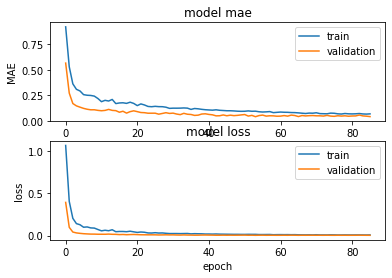

In [47]:
# Plot results
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax1.set_title('model mae')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper right')

# Plot loss and val_loss over each epoch
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper right')

plt.show()